In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
data=pd.read_csv('Social_Network_Ads.csv')

In [16]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [44]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

In [55]:
y_pred=classifier.predict(x_test)
y_pred.reshape(len(y_pred),1)
y_test.reshape(len(y_test),1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[63  5]
 [ 8 24]]


0.87

TypeError: 'function' object is not subscriptable

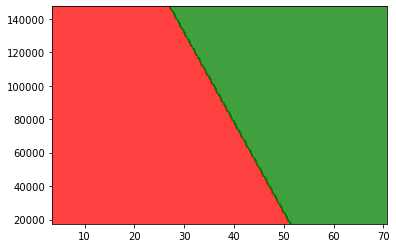

In [70]:
from matplotlib.colors import ListedColormap
x_set,y_set=sc.inverse_transform(x_train),y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25),
                 np.arange(start=x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step=0.25))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique[y_set]):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
#plt.title('Logistic Regression Training Set')
#plt.xlabel('Age')
#plt.ylabel('Estimated Salary')
plt.show()